# 🩻98% Accuracy on Chest X-Ray with fast.ai

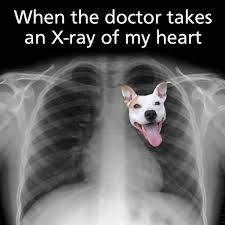

This is simple way to train ur medical data images with fast.ai. This is basic solution and in future i need to do: other metrics, like f1 score, precision, other augmentation methods.

### 1. Import fast.ai framework as *

In [1]:
from fastai import *
from fastai.vision import *
from fastai.vision.all import *

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### 2. Check GPU

In [2]:
import torch
torch.cuda.is_available()

True

### 3. Load train data and create dls loader with params of model, change device to 'cuda' and resize to 192x192 all images.

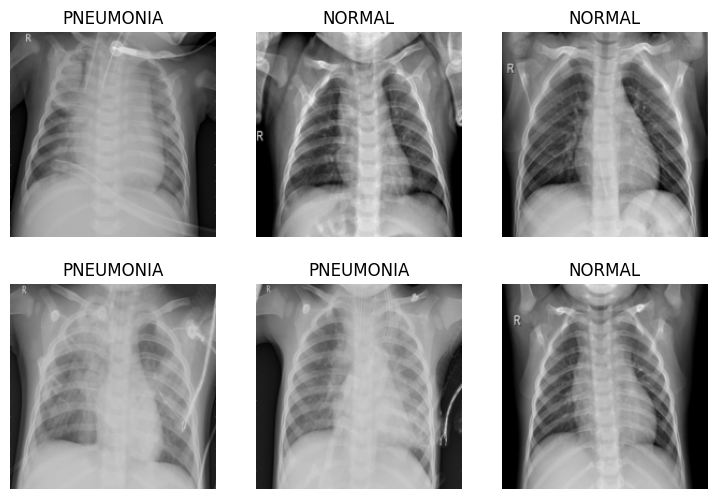

In [3]:
train_path = '/kaggle/input/labeled-chest-xray-images/chest_xray/train'

dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')],
).dataloaders(train_path, bs=32, device=torch.device('cuda'))

dls.show_batch(max_n=6)

### 4. Create learner with resnet34 and metrics - then run.

In [ ]:
learn = vision_learner(dls, resnet34, metrics=[error_rate, accuracy])
learn.fine_tune(5)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 75.8MB/s]


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.373650,0.190880,0.062141,0.937859,01:08


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.127317,0.052871,0.015296,0.984704,01:09
1,0.086746,0.078887,0.022945,0.977055,01:09
2,0.051674,0.039353,0.009560,0.990440,01:09


### 5. Test model on test data.

In [ ]:
normal, _, probs = learn.predict(PILImage.create("/kaggle/input/labeled-chest-xray-images/chest_xray/test/NORMAL/NORMAL-115218-0001.jpeg"))
print(f"Diagnosis: {normal}.")
print(f"The probability of Normal is.: {probs[0]:.4f}")

### 6. Plot confussion matrix 

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.print_classification_report()